In [2]:
# If working on Google Colab

# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/MyDrive/NLP_RNN_LSTM/AirPassengers.csv')  # Mention Dataset Path here
# df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.shape

(144, 2)

In [5]:
df.columns = ['Date', 'Passengers']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df = df.set_index('Date')
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.isnull().sum()

Passengers    0
dtype: int64

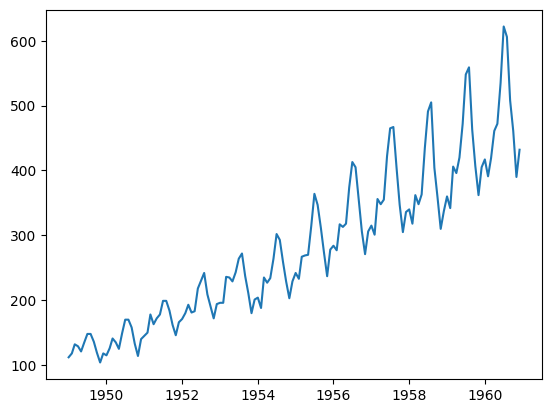

In [7]:
plt.plot(df)
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

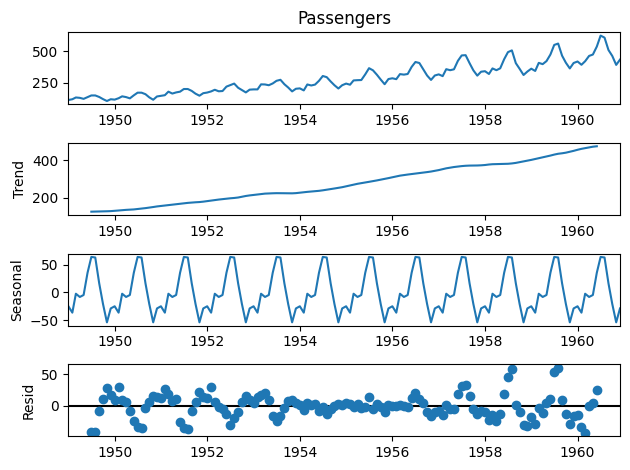

In [9]:
a = seasonal_decompose(df["Passengers"], model = "add")
a.plot();

In [10]:
#### Dividing into train and test

In [11]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
print(train_data.shape)
print(test_data.shape)

(132, 1)
(12, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [13]:
print(scaled_train_data.shape)
print(scaled_test_data.shape)

(132, 1)
(12, 1)


In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [15]:
for i in range(len(generator)):
 x, y = generator[i]
 print(f'{x} => {y}')

[[[0.01758242]
  [0.03076923]
  [0.06153846]
  [0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]]] => [[0.02417582]]
[[[0.03076923]
  [0.06153846]
  [0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]]] => [[0.04835165]]
[[[0.06153846]
  [0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]
  [0.04835165]]] => [[0.08131868]]
[[[0.05494505]
  [0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]
  [0.04835165]
  [0.08131868]]] => [[0.06813187]]
[[[0.03736264]
  [0.06813187]
  [0.0967033 ]
  [0.0967033 ]
  [0.07032967]
  [0.03296703]
  [0.        ]
  [0.03076923]
  [0.02417582]
  [0.04835165]
  [0.08131868]
  [0.06813187]]] => [[0.04615385]]


In [16]:
m1 = Sequential()
m1.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))    # (n_input = 12, n_features= 1)
m1.add(Dense(1))   # activation= linear
m1.compile(optimizer='adam', loss='mse')

m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [17]:
h1 = m1.fit(generator,epochs=20)

Epoch 1/20
120/120 [==============================] - 2s 4ms/step - loss: 0.0257
Epoch 2/20
120/120 [==============================] - 1s 4ms/step - loss: 0.0155
Epoch 3/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0105
Epoch 4/20
120/120 [==============================] - 1s 4ms/step - loss: 0.0103
Epoch 5/20
120/120 [==============================] - 1s 4ms/step - loss: 0.0083
Epoch 6/20
120/120 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 7/20
120/120 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 8/20
120/120 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 9/20
120/120 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 10/20
120/120 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 11/20
120/120 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 12/20
120/120 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 13/20
120/120 [====

In [18]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,Epochs
15,0.002118,15
16,0.003680,16
17,0.002403,17
18,0.002179,18
19,0.001929,19


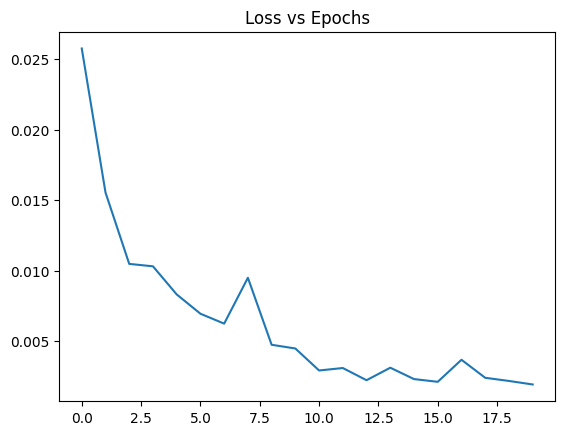

In [19]:
plt.plot(r1['Epochs'],r1['loss'])
plt.title('Loss vs Epochs')
plt.show()

In [20]:
# input_shape=(28,28,1)
# input_shape=(1,28,28,1)

In [21]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]      # n_input=12
print(batch.shape)
current_batch = batch.reshape((1, n_input, n_features))
print(current_batch.shape)

for i in range(len(test_data)):   
    lstm_pred = m1.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

(12, 1)
(1, 12, 1)
1/1 [==============================] - 0s 15ms/step


In [22]:
lstm_predictions_scaled

[array([0.6312052], dtype=float32),
 array([0.6490008], dtype=float32),
 array([0.7261655], dtype=float32),
 array([0.7659032], dtype=float32),
 array([0.8602741], dtype=float32),
 array([1.0327497], dtype=float32),
 array([1.222945], dtype=float32),
 array([1.2165966], dtype=float32),
 array([1.0038743], dtype=float32),
 array([0.8209947], dtype=float32),
 array([0.7389944], dtype=float32),
 array([0.74129844], dtype=float32)]

In [23]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
print(lstm_predictions)

[[391.19836652]
 [399.29537469]
 [434.40529042]
 [452.48594457]
 [495.42470479]
 [573.90109205]
 [660.43996358]
 [657.55145454]
 [560.76280737]
 [477.5525772 ]
 [440.24246091]
 [441.29078889]]


In [24]:
test_data1 = test_data.copy()

In [25]:
test_data1['ypred_LSTM'] = lstm_predictions
test_data1

,Passengers,ypred_LSTM
Date,,
1960-01-01,417,391.198367
1960-02-01,391,399.295375
1960-03-01,419,434.405290
1960-04-01,461,452.485945
1960-05-01,472,495.424705
1960-06-01,535,573.901092
1960-07-01,622,660.439964
1960-08-01,606,657.551455
1960-09-01,508,560.762807


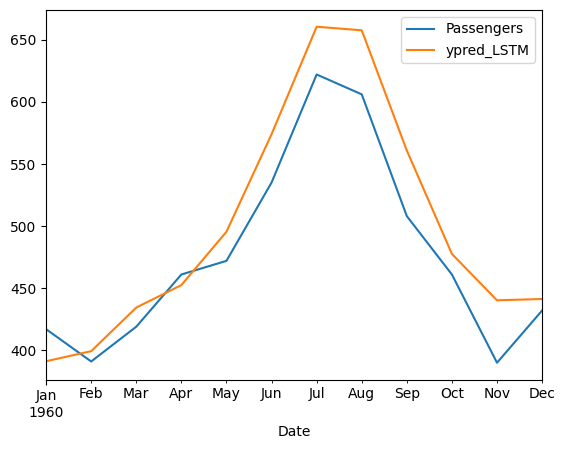

In [26]:
test_data1['Passengers'].plot(legend=True)
test_data1['ypred_LSTM'].plot(legend = True)
plt.show()

In [27]:
lstm_rmse = rmse(test_data1['Passengers'], test_data1["ypred_LSTM"])
lstm_mse = lstm_rmse**2

print(f'MSE Error: {lstm_mse}\nRMSE Error: {lstm_rmse}')

MSE Error: 1075.8391630631263
RMSE Error: 32.79998724181347
